# Extended Kalman Filter

a) Guessing the posterior after it moves.

Non-linear motion model:

$\begin{bmatrix}x' \\ y' \\ \theta \end{bmatrix} = \begin{bmatrix} x+cos\theta \\ y+sin\theta \\ \theta \end{bmatrix}$

Our initial estimate is given as:

$\Sigma_0 = \begin{bmatrix} 0.01 & 0 & 0 \\ 0 & 0.01 & 0 \\ 0 & 0 & 10000\end{bmatrix}$

$\mu_0 = [0,0,0]$


The posterior will likely be a hollow circle. We know that the robot moved 1 unit. So let's say it moved in the x direction. Our covariance tells us that we know the x and y state variables with good certainty. However the rotation has very high variance. Therefore, the circle.

TODO: Demonstrate

### Deriving the prediction step

The state transition function can be writte as

$x_t = g(u_t, x_{t-1}) + \epsilon_t$

The linearization equation is

$g(u_t, x_{t-1}) = g(u_t, \mu_{t-1}) + g'(u_t, \mu_{t-1})(x_{t-1}-\mu_{t-1})$

The Jacobian will be

$\frac{\partial g(u_t, x_{t-1})}{\partial x_{x-1}} = 
\begin{bmatrix} 1 & 0 & -sin\theta \\ 0 & 1 &cos\theta \\ 0 & 0 & 1 \end{bmatrix}$

In [77]:
# Jacobian
def Gt(mean_prev):
    theta = mean_prev[0]
    return np.array([[1, 0, -np.sin(theta)], [0, 1, np.cos(theta)], [0, 0, 1]])

In [78]:
def Prediction(mean_prev, cov_prev, control):
    x_prev = mean_prev[0]
    y_prev = mean_prev[1]
    theta_prev = mean_prev[2]
    
    mean_predict = np.array([x_prev, 
                             y_prev, 
                             theta_prev]) + control
    
    G_prev = Gt(mean_prev)
    cov_predict = G_prev.dot(cov_prev).dot(G_prev.transpose())
    
    return mean_predict, cov_predict

In [79]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[1.e-02 1.e-02 1.e+04]


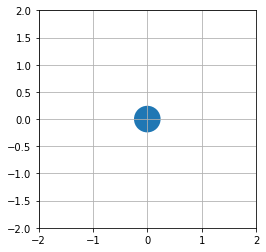

In [80]:
def drawEllipse(center, covariance):
    [eigValues_predict, eigVectors_predict] = LA.eig(covariance)
    print(eigVectors_predict)
    print(eigValues_predict)
    
    ellipseWidth = 2 * math.sqrt(eigValues_predict[0] * 5.991)
    ellipseHeight = 2 * math.sqrt(eigValues_predict[1] * 5.991)
    angle = math.atan(eigVectors_predict[1,0]/eigVectors_predict[0,0])
    angleDegree = angle*180/math.pi

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, aspect='equal')
    e1=Ellipse(center, ellipseWidth, ellipseHeight, angleDegree, label="prediction")
    ax.add_patch(e1)
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    plt.grid(True)

    plt.show()
    
    
cov_estimate = np.array([[0.01, 0, 0], [0, 0.01, 0], [0, 0, 10000]])
drawEllipse((0,0), cov_estimate)

Mean:
 [1 0]
Covariance:
 [[1.000000e-02 0.000000e+00]
 [0.000000e+00 1.000001e+04]]
[[1. 0.]
 [0. 1.]]
[1.000000e-02 1.000001e+04]


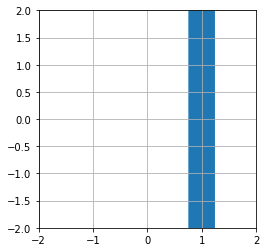

In [81]:
cov_prev = np.array([[0.01, 0, 0], [0, 0.01, 0], [0, 0, 10000]])
mean_prev = np.array([0, 0, 0])

# move in x
control = np.array([1, 0, 0])

[mean, cov] = Prediction(mean_prev, cov_prev, control)

mean = mean[:2]
cov =  cov[:2, :2]
print("Mean:\n", mean)
print("Covariance:\n", cov)
drawEllipse(mean, cov)

### Measurement Model

In [83]:
# TODO